In [1]:
import tensorflow as tf
from scipy.io import loadmat

In [2]:
# Run this cell to load the dataset

train = loadmat('data/train_32x32.mat')
test = loadmat('data/test_32x32.mat')

In [3]:
train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [4]:
test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [5]:
import numpy as np

train_img = np.array(train['X'])
test_img = np.array(test['X'])

train_label = train['y']
test_label = test['y']

In [6]:
train_img = np.moveaxis(train_img, -1, 0)
test_img = np.moveaxis(test_img, -1, 0)

In [7]:
train_img.shape

(73257, 32, 32, 3)

In [8]:
import matplotlib.pyplot as plt

In [9]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

/home/ikraminf/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


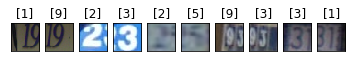

In [10]:
plot_images(train_img, train_label, 1, 10)

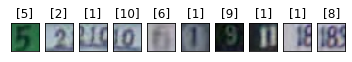

In [11]:
plot_images(test_img, test_label, 1, 10)

In [12]:
# to check unique labels
np.unique(train_label)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [13]:
train_label[train_label == 10] = 0
test_label[test_label == 10] = 0

In [14]:
def rgb2gray(images):
    return np.expand_dims(np.dot(images, [0.2990, 0.5870, 0.1140]), axis=3)

In [15]:
X_train = rgb2gray(train_img).astype(np.float32)
X_test = rgb2gray(test_img).astype(np.float32)

In [16]:
print("Training Set", X_train.shape)
print("Test Set", X_test.shape)

Training Set (73257, 32, 32, 1)
Test Set (26032, 32, 32, 1)


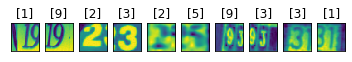

In [17]:
plot_images(X_train, train_label, 1, 10)

In [18]:
X_train = X_train/255.0
X_test = X_test/255.0

In [19]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

In [20]:
print(y_train[0])

[0 1 0 0 0 0 0 0 0 0]


In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(73257, 32, 32, 1)
(73257, 10)
(26032, 32, 32, 1)
(26032, 10)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [23]:
def mlp_nn_classifier():
    
    model = Sequential([
                        Flatten(input_shape=(32, 32, 1)),
                        Dense(512, activation='relu'),
                        Dense(128, activation='relu'),
                        Dense(64, activation='relu'),
                        Dense(10, activation='softmax')
                    
    ])
    
    return model

In [24]:
model = mlp_nn_classifier()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 599,370
Trainable params: 599,370
Non-trainable params: 0
_________________________________________________________________


In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

def get_checkpoint_every_epoch():
    
    checkpoint_path = 'model_checkpoint/checkpoint'
    checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                            frequency='epoch',
                            save_weights_only=True,
                            verbose=1)
    return checkpoint

def get_early_stopping():
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)
    return early_stopping

In [26]:
 model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
checkpoint = get_checkpoint_every_epoch()
early_stopping = get_early_stopping()

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test),
                    callbacks=[checkpoint, early_stopping])

Train on 73257 samples, validate on 26032 samples
Epoch 1/30
73248/73257 [============================>.] - ETA: 0s - loss: 1.9339 - accuracy: 0.3084
Epoch 00001: saving model to model_checkpoint/checkpoint
73257/73257 [==============================] - 42s 579us/sample - loss: 1.9338 - accuracy: 0.3084 - val_loss: 1.5425 - val_accuracy: 0.4931
Epoch 2/30
73152/73257 [============================>.] - ETA: 0s - loss: 1.3373 - accuracy: 0.5579
Epoch 00002: saving model to model_checkpoint/checkpoint
73257/73257 [==============================] - 38s 520us/sample - loss: 1.3372 - accuracy: 0.5580 - val_loss: 1.3130 - val_accuracy: 0.5806
Epoch 3/30
73216/73257 [============================>.] - ETA: 0s - loss: 1.1731 - accuracy: 0.6236
Epoch 00003: saving model to model_checkpoint/checkpoint
73257/73257 [==============================] - 40s 541us/sample - loss: 1.1730 - accuracy: 0.6236 - val_loss: 1.2601 - val_accuracy: 0.6077
Epoch 4/30
73184/73257 [============================>.] - E

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

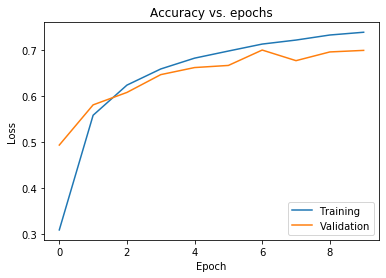

In [29]:
# Run this cell to plot the epoch vs accuracy graph

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

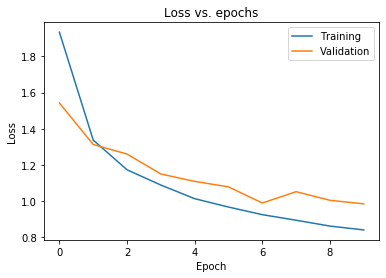

In [30]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [31]:
from tensorflow.keras.layers import BatchNormalization, Dropout, Conv2D, MaxPooling2D

In [58]:
def cnn_classifier():    
    
    model = Sequential([
                Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 1)),
                MaxPooling2D(2, 2),
                Conv2D(64, (3,3), activation='relu'),
                MaxPooling2D(2,2),
                Flatten(),
                Dense(128, activation='relu'),
                Dense(64, activation='relu'),
                Dense(10, activation='softmax')
        ])
    
    return model

In [59]:
cnn_model = cnn_classifier()
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               295040    
_________________________________________________________________
dense_11 (Dense)             (None, 64)               

In [60]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [61]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}) :
        if(logs.get('accuracy') is not None and logs.get('accuracy') >= 0.999) :
            print('\nReached 99.9% accuracy so cancelling training!')
            self.model.stop_training = True

cancelling_train = myCallback()

In [62]:
checkpoint_every_epoch = get_checkpoint_every_epoch()
early_stopping = get_early_stopping()

history = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),
                    callbacks=[checkpoint, early_stopping, cancelling_train])

Train on 73257 samples, validate on 26032 samples
Epoch 1/10
73248/73257 [============================>.] - ETA: 0s - loss: 0.9687 - accuracy: 0.6885
Epoch 00001: saving model to model_checkpoint/checkpoint
73257/73257 [==============================] - 212s 3ms/sample - loss: 0.9686 - accuracy: 0.6886 - val_loss: 0.5974 - val_accuracy: 0.8285
Epoch 2/10
73248/73257 [============================>.] - ETA: 0s - loss: 0.4911 - accuracy: 0.8554
Epoch 00002: saving model to model_checkpoint/checkpoint
73257/73257 [==============================] - 181s 2ms/sample - loss: 0.4911 - accuracy: 0.8554 - val_loss: 0.5257 - val_accuracy: 0.8435
Epoch 3/10
73216/73257 [============================>.] - ETA: 0s - loss: 0.4199 - accuracy: 0.8742
Epoch 00003: saving model to model_checkpoint/checkpoint
73257/73257 [==============================] - 184s 3ms/sample - loss: 0.4199 - accuracy: 0.8742 - val_loss: 0.4982 - val_accuracy: 0.8528
Epoch 4/10
73248/73257 [============================>.] - ETA:

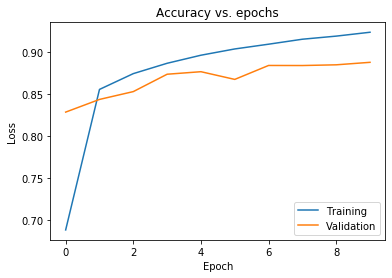

In [63]:
# Run this cell to plot the epoch vs accuracy graph

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

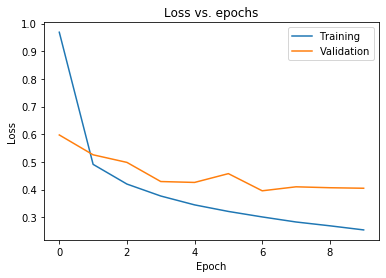

In [64]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [65]:
model = cnn_classifier()

In [66]:
model.load_weights('model_checkpoint/checkpoint')

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [70]:
# Get predictions and apply inverse transformation to the labels

y_pred = model.predict(X_train)

y_pred = lb.inverse_transform(y_pred, lb.classes_)
#y_train = lb.inverse_transform(y_train, lb.classes_)

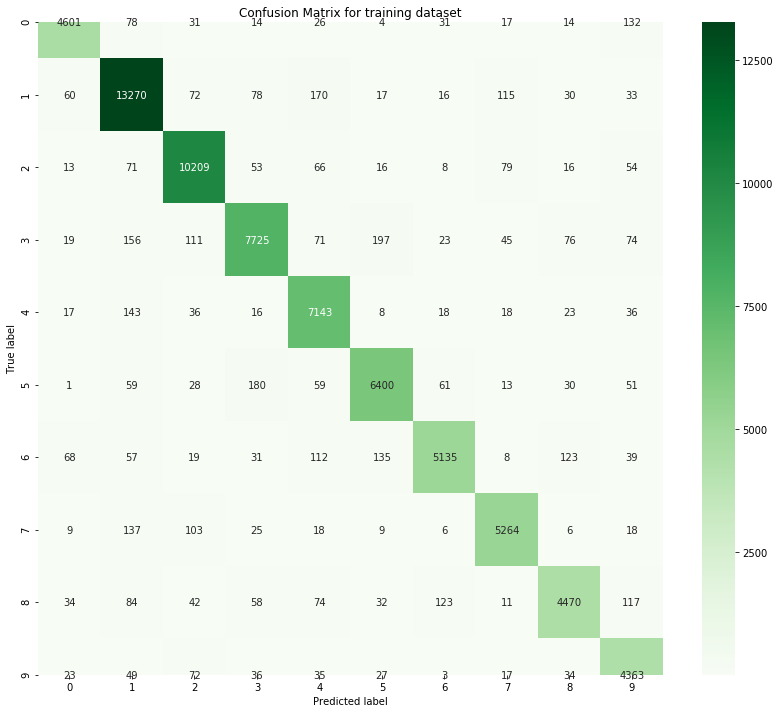

In [71]:
# Plot the confusion matrix

matrix = confusion_matrix(y_train, y_pred, labels=lb.classes_)

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix for training dataset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [72]:
# Get predictions and apply inverse transformation to the labels

y_pred_prime = model.predict(X_test)

y_pred_prime = lb.inverse_transform(y_pred_prime, lb.classes_)
#y_test = lb.inverse_transform(y_test, lb.classes_)

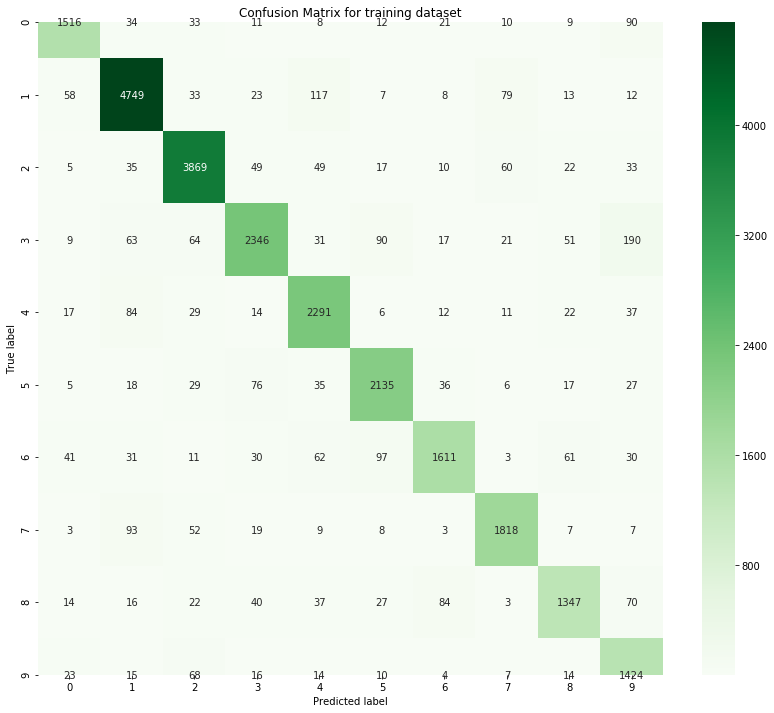

In [73]:
# Plot the confusion matrix

matrix = confusion_matrix(y_test, y_pred_prime, labels=lb.classes_)

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix for training dataset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [74]:
import pandas as pd
y_pred = pd.DataFrame(y_pred)
y_pred_prime = pd.DataFrame(y_pred_prime)

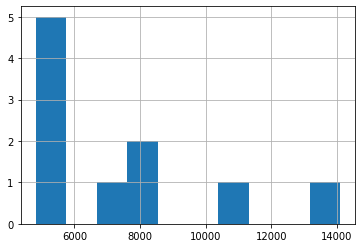

In [75]:
pd.value_counts(y_pred.values.flatten()).hist()

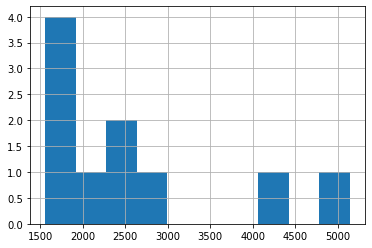

In [76]:
pd.value_counts(y_pred_prime.values.flatten()).hist()